# 1. Introduction to Python and Libraries for Machine Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

### Data Loading

In [5]:
df = pd.read_csv("data.csv")

### Environmental Setup

In [8]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [10]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [14]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


### Handling missing values, data normalization, standardization

In [17]:
df.isnull().sum() 

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])

X = df.drop('Drug', axis=1)
y = df['Drug']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Data visualization using Matplotlib and Seaborn

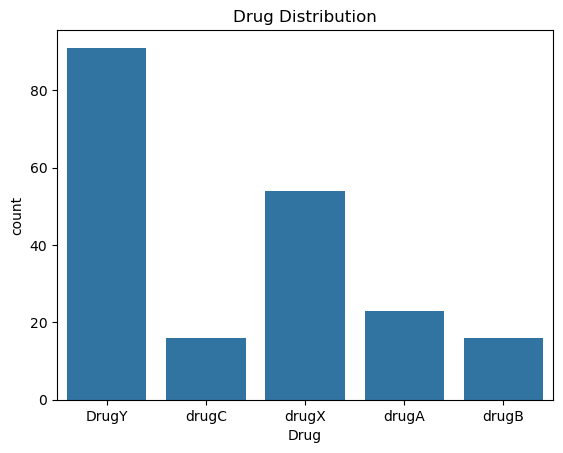

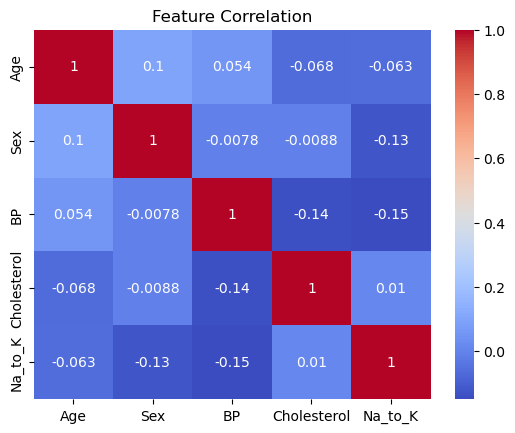

In [20]:
sns.countplot(x='Drug', data=df)
plt.title("Drug Distribution")
plt.show()
sns.heatmap(df.drop('Drug', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

### Data preprocessing 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Logistic Regression for binary classification, Model evaluation using metrics (R², MAE, MSE)

In [26]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

       DrugY       0.88      0.93      0.90        15
       drugA       0.86      1.00      0.92         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.80      0.89         5
       drugX       1.00      0.91      0.95        11

    accuracy                           0.93        40
   macro avg       0.95      0.93      0.93        40
weighted avg       0.93      0.93      0.93        40



### Implementing Decision Tree

In [29]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



### Implementing Support Vector Machine

In [32]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

       DrugY       0.94      1.00      0.97        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.80      0.89         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.97        40
   macro avg       0.99      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



### Evaluation Matrices for classification 

[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  4  0]
 [ 0  0  0  0 11]]
0.975


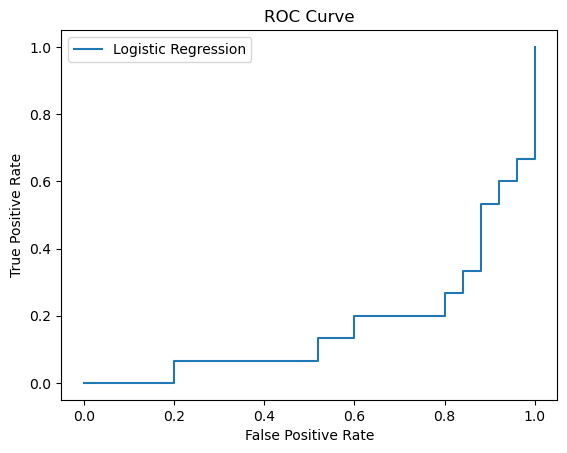

In [35]:
print(confusion_matrix(y_test, y_pred_svm))
print(accuracy_score(y_test, y_pred_svm))
y_proba_lr = log_reg.predict_proba(X_test)


fpr, tpr, _ = roc_curve(y_test, y_proba_lr[:, 1], pos_label='DrugY')

plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### User Input and Output

In [38]:
def get_user_input():
    age = int(input("Age: "))
    sex = input("Sex (M/F): ")
    bp = input("BP (LOW/NORMAL/HIGH): ")
    chol = input("Cholesterol (NORMAL/HIGH): ")
    na_to_k = float(input("Na_to_K: "))
    sex = 1 if sex.upper() == 'M' else 0
    bp = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}.get(bp.upper(), 1)
    chol = {'NORMAL': 0, 'HIGH': 1}.get(chol.upper(), 1)
    user_data = pd.DataFrame([[age, sex, bp, chol, na_to_k]],
                             columns=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
    user_data_scaled = scaler.transform(user_data)
    return user_data_scaled

user_input_scaled = get_user_input()
prediction = svm_model.predict(user_input_scaled)
print("\n Predicted Drug Recommendation:", prediction[0])

Age:  18
Sex (M/F):  M
BP (LOW/NORMAL/HIGH):  NORMAL
Cholesterol (NORMAL/HIGH):  NORMAL
Na_to_K:  35



 Predicted Drug Recommendation: DrugY
